# Predicting galaxy redshift from band magnitudes with XGBoost

Zooey Nguyen

2021-07-01

mostly same code as `HSC Photo-Z Data and Simple Model Exploration.ipynb`

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Import photoz data + filter out bad objects

These are some of the criteria from Schuldt et al. 2020
* source type is GALAXY or LRG 
* z>0
* z != 9.99992
* 0<zerr <1
* the galaxy identification number (ID) is unique
* specz flag homogeneous is False

In [108]:
photozdata = pd.read_csv('/data/HSC/HSC_IMAGES_FIXED/HSC_photozdata_full_header_trimmed.csv')
filt = (photozdata['specz_redshift'] < 4) & (photozdata['specz_redshift'] > 0)& (photozdata['specz_redshift_err'] > 0) \
       & (photozdata['specz_redshift_err'] < 1)
photozdata_subset = photozdata[filt]

## Make train and test sets on filtered data

In [109]:
X = photozdata_subset[['g_cmodel_mag','r_cmodel_mag','i_cmodel_mag','z_cmodel_mag','y_cmodel_mag']]
y = photozdata_subset['specz_redshift']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train simple XGBoost regression

In [110]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Evaluate training fit

MSE: 0.09091676790151508


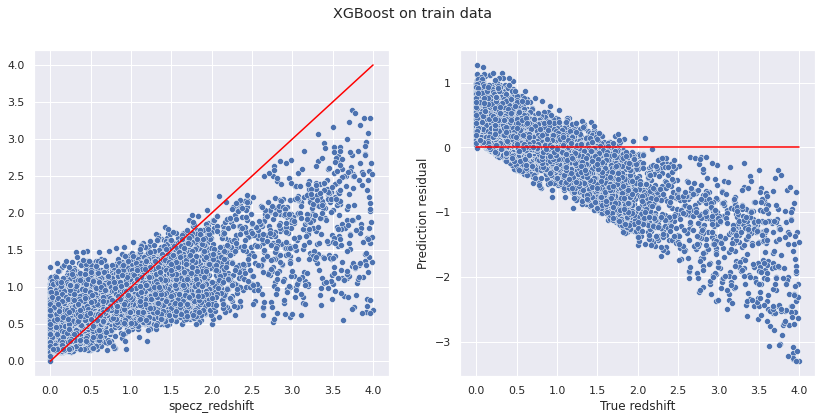

In [113]:
y_train_predict = xgb_model.predict(X_train)

xgb_mse = mean_squared_error(y_train, y_train_predict)
print(f"MSE: {xgb_mse}")

fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle("XGBoost on train data")
sns.scatterplot(x=y_train, y=y_train_predict, ax=axes[0])
axes[0].plot([0,4], [0,4], color='red')
sns.scatterplot(x=y_train, y=y_train_predict-y_train, ax=axes[1])
axes[1].set(xlabel='True redshift', ylabel='Prediction residual')
axes[1].plot([0,4], [0,0], color='red')

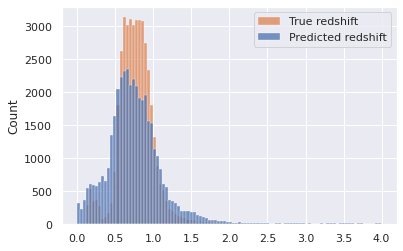

In [114]:
fig = sns.histplot([y_train, y_train_predict], bins=100)
fig.legend(labels=['True redshift', 'Predicted redshift'])

## Evaluate test fit

MSE: 0.14312437299074413


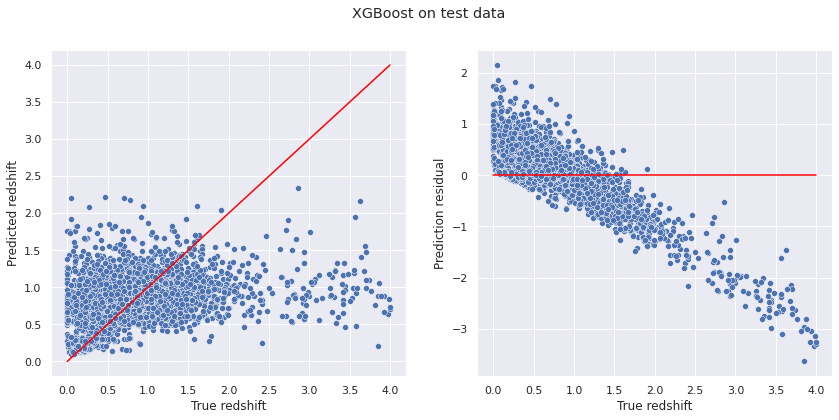

In [115]:
y_test_predict = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, y_test_predict)
print(f"MSE: {xgb_mse}")

fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle("XGBoost on test data")
sns.scatterplot(x=y_test, y=y_test_predict, ax=axes[0])
axes[0].set(xlabel='True redshift', ylabel='Predicted redshift')
axes[0].plot([0,4], [0,4], color='red')
sns.scatterplot(x=y_test, y=y_test_predict-y_test, ax=axes[1])
axes[1].set(xlabel='True redshift', ylabel='Prediction residual')
axes[1].plot([0,4], [0,0], color='red')

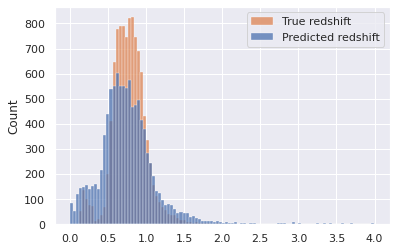

In [116]:
fig = sns.histplot([y_test, y_test_predict], bins=100)
fig.legend(labels=['True redshift', 'Predicted redshift'])